## Step Function
The step or threshold activation function is a simple activation function. In the year 1943 McCulloch & Pitts introduced the original perceptron and used a step activation function like the following equation
$$ f(x) =
  \begin{cases}
    1       & \quad \text{if } x > \theta \\
    0       & \quad \text{if } x \leq \theta
  \end{cases} $$
  
This equation outputs a value of 1.0 for incoming values of (threshold value) or higher and 0 for all other values. Step functions, also known as threshold functions, only return 1 (true) for values that are above the specified threshold, as seen in Figure bellow.

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


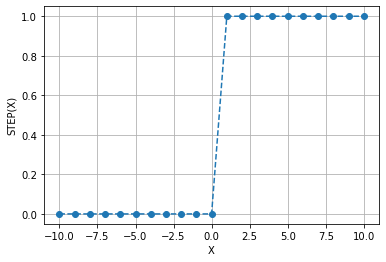

In [1]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.arange(-10, 11, 1)
print(x)
def plot_graph(y,ylabel):
    plt.figure()
    plt.plot(x,y, 'o--')
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel(ylabel)
    plt.show()
y = list(map(lambda n: 1 if n>0.5 else 0, x))
plot_graph(y,"STEP(X)")

## Sigmoid Function

The sigmoid non-linearity has the mathematical form as bellow.
$$ \sigma (x) =  \frac{1}{1 + e^ \left(-x \right)} $$

it takes a real-valued number and squashes it into range between 0 and 1. Therefore, it is especially used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the good choice.

In particular, large negative numbers become 0 and large positive numbers become 1. The sigmoid function has seen frequent use historically. The sigmoid non-linearity has recently fallen out of favor and it is rarely ever used - because of the following drawbacks:

Vanishing gradient—for very high or very low values of X, there is almost no change to the prediction, causing a vanishing gradient problem. This can result in the network refusing to learn further, or being too slow to reach an accurate prediction.
Outputs not zero centered.
Computationally expensive
The Sigmoid Function curve looks like a S-shape.

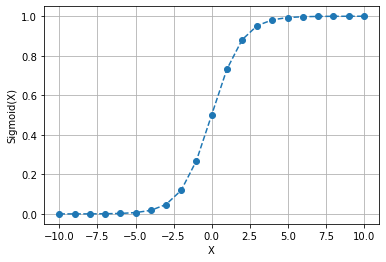

In [2]:
y = 1 / (1 + np.exp(-x))
plot_graph(y, "Sigmoid(X)")

## Tanh

The hyperbolic tangent function is also a prevalent activation function for neural networks that must output values in the range between -1 and 1. This activation function is simply the hyperbolic tangent (tanh) function, as shown in the following equation:

$$ \begin{split}
            tanh(x) & = \frac{e^x - e^{-x}}{e^x + e^{-x}} \\
                    & = \frac{e^{2x} - 1}{e^{2x} + 1}
\end{split} $$

Like the sigmoid neuron, its activations saturate, but unlike the sigmoid neuron its output is zero-centered. Therefore, in practice the tanh non-linearity is always preferred to the sigmoid nonlinearity. Also note that the tanh neuron is simply a scaled sigmoid neuron, in particular the following holds:

$$ tanh(x) = 2 \sigma \left( 2x \right) -1 $$

As for Sigmoid, Tanh is highly compute-intensive and suffers from saturation problem and thus vanishing gradient. In fact, when the neuron reaches the minimum or maximum value of its range, that respectively correspond to -1 and 1, its derivative is equal to 0.

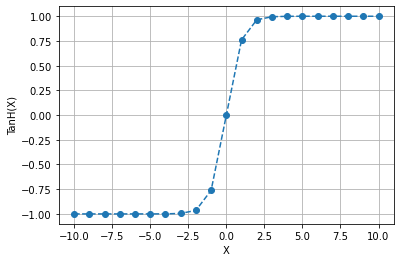

In [3]:
y = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
plot_graph(y, "TanH(X)")

## ReLU
The rectified linear unit (ReLU) was introduced by Teh & Hinton in 2001. The Rectified Linear Unit has become very popular in the last few years. The following equation shows the straightforward ReLU function:

$$ f(x) = max(0,x) $$

In other words, the activation is simply thresholded at zero

$$ f(x) =
  \begin{cases}
    x       & \quad \text{if } x \geq 0 \\
    0       & \quad \text{if } x < 0
  \end{cases} $$
  
There are several pros and cons to using the ReLUs:

It was found to greatly accelerate the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. It is argued that this is due to its linear, non-saturating form.

Compared to tanh/sigmoid neurons that involve expensive operations (exponentials, etc.), the ReLU can be implemented by simply thresholding a matrix of activations at zero.

But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.

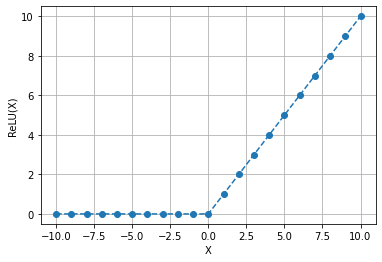

In [4]:
y = list(map(lambda a: a if a>=0 else 0, x))
plot_graph(y,"ReLU(X)")

## Elu
The Exponential Linear Unit (ELU) is an activation function commonly used in artificial neural networks. The ELU activation function is a differentiable function that maps the input values to an output range of (-1, ∞).

The ELU activation function is defined by the following equation:
$$ ELU(x) =
  \begin{cases}
    x       & \quad \text{if } x > 0 \\
    \alpha(e^x -1)       & \quad \text{if } x < 0
  \end{cases} $$
  
where x is the input to the function, and α is a hyperparameter that determines the value that the function approaches for large negative values of x. The parameter α is usually set to 1.0.

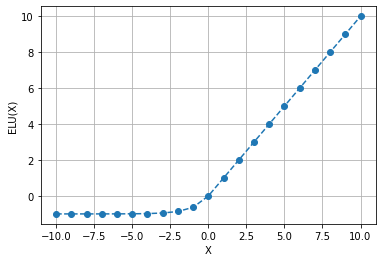

In [20]:
alpha = 1
y = np.where(x > 0, x, alpha * (np.exp(x) - 1))
plot_graph(y,"ELU(X)")

## SELU
The Scaled Exponential Linear Unit (SELU) is an activation function used in artificial neural networks. The SELU activation function is a variant of the Exponential Linear Unit (ELU) activation function that has been shown to work well in deep neural networks.

The SELU activation function is defined by the following equation:

$$ SELU(x) = \lambda
  \begin{cases}
    x       & \quad \text{if } x \geq 0 \\
    \alpha(e^x -1)       & \quad \text{if } x < 0
  \end{cases} $$
  
where λ and α are scaling parameters that ensure that the output of the activation function has a mean of 0 and a standard deviation of 1, thus enabling the activation function to prevent the vanishing/exploding gradient problem commonly encountered in deep neural networks. Specifically, λ is chosen to be the square root of the reciprocal of the expected value of the squared input of the activation function, and α is a constant that is related to the λ and the slope of the function.

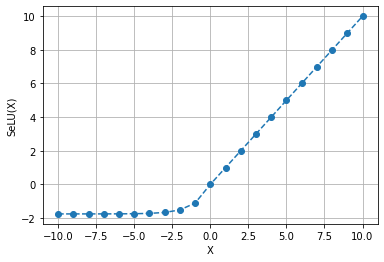

In [22]:
lamda = 1.0507
alpha = 1.6734
y = np.where(x > 0, x, lamda*alpha * (np.exp(x) - 1))
plot_graph(y,"SeLU(X)")